In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from sklearn.model_selection import GroupKFold

In [3]:
merged = pd.DataFrame(pd.read_pickle('../raw_merged_data_v2_withinyears'))
merged_years = merged[merged['date'] <= 2018]
merged_years

,date,Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year),setting,"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4 (% of population ages 0-4)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)",Women participating in own health care decisions (% of women age 15-49),Antiretroviral therapy coverage (% of adult males living with HIV),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)",...,Land area where elevation is below 5 meters (% of total land area) urban,Population living in areas where elevation is below 5 meters (% of total population) rural,Population living in areas where elevation is below 5 meters (% of total population) urban,Coverage of social safety net programs (% of population) Quintile 1 (poorest),Coverage of social safety net programs (% of population) Quintile 5 (richest),Coverage of social insurance programs (% of population) Quintile 1 (poorest),Coverage of social insurance programs (% of population) Quintile 5 (richest),Coverage of unemployment benefits and ALMP (% of population) Quintile 1 (poorest),Coverage of unemployment benefits and ALMP (% of population) Quintile 5 (richest),income_num
1,2015.0,NaN,Algeria,18.055,NaN,70.700,4.082,NaN,43.0,4.081,...,0.007108,0.120913,1.124755,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2010.0,NaN,Algeria,17.537,NaN,72.403,4.115,NaN,21.0,4.153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2000.0,NaN,Algeria,20.944,NaN,77.248,4.371,NaN,7.0,4.454,...,0.006448,0.165027,1.217309,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,2018.0,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,58.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6,2017.0,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,53.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,2015.0,NaN,COK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9545,2000.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9546,2005.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9547,2010.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
missing_dropped = merged_years.dropna(axis=1, how='all', ignore_index=True)
missing_dropped.shape

(9018, 727)

In [5]:
rdrop = missing_dropped.dropna(axis=0, how='all', ignore_index=True)
rdrop.shape

(9018, 727)

In [6]:
missing_columns = merged_years.columns.difference(missing_dropped.columns)
missing_columns

Index(['Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)',
       'Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)',
       'Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)',
       'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
       'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene, female (per 100,000 female population)',
       'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene, male (per 100,000 male population)'],
      dtype='object')

In [7]:
ydrop = missing_dropped.dropna(subset=['Maternal mortality ratio (national estimate, per 100,000 live births)'])
ydrop

,date,Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year),setting,"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4 (% of population ages 0-4)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)",Women participating in own health care decisions (% of women age 15-49),Antiretroviral therapy coverage (% of adult males living with HIV),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)","Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)",...,Land area where elevation is below 5 meters (% of total land area) urban,Population living in areas where elevation is below 5 meters (% of total population) rural,Population living in areas where elevation is below 5 meters (% of total population) urban,Coverage of social safety net programs (% of population) Quintile 1 (poorest),Coverage of social safety net programs (% of population) Quintile 5 (richest),Coverage of social insurance programs (% of population) Quintile 1 (poorest),Coverage of social insurance programs (% of population) Quintile 5 (richest),Coverage of unemployment benefits and ALMP (% of population) Quintile 1 (poorest),Coverage of unemployment benefits and ALMP (% of population) Quintile 5 (richest),income_num
2,2000.0,NaN,Algeria,20.944,77.248,4.371,NaN,7.0,4.454,NaN,...,0.006448,0.165027,1.217309,NaN,NaN,NaN,NaN,NaN,NaN,3.0
39,2011.0,NaN,Bangladesh,NaN,NaN,NaN,63.0,7.0,NaN,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
42,2017.0,NaN,Bangladesh,NaN,NaN,NaN,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
52,2001.0,NaN,Bangladesh,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
70,2010.0,NaN,Burkina Faso,61.242,92.583,25.737,23.7,32.0,25.313,35.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,1989.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
8360,1988.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
8361,1987.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
8362,1986.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [8]:
dropped = ydrop.drop(['Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Lifetime risk of maternal death (1 in: rate varies by country)', 'Lifetime risk of maternal death (%)', 'Number of maternal deaths'], axis=1)

In [9]:
dropped = dropped[dropped['income_num'] != 0]

In [10]:
dropped.shape

(2789, 723)

In [11]:
rdrop['date'].unique()

array([2015., 2010., 2000., 2018., 2017., 2016., 2014., 2013., 2012.,
       2011., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985.])

In [12]:
dropped['income_num'].unique()

array([3., 2., 1., 4.])

In [13]:
indexed = dropped.set_index(['date', 'setting'])
indexed

,,Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4 (% of population ages 0-4)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)",Women participating in own health care decisions (% of women age 15-49),Antiretroviral therapy coverage (% of adult males living with HIV),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)","Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)","Mortality rate, infant (per 1,000 live births)",Female genital mutilation prevalence (%),...,Land area where elevation is below 5 meters (% of total land area) urban,Population living in areas where elevation is below 5 meters (% of total population) rural,Population living in areas where elevation is below 5 meters (% of total population) urban,Coverage of social safety net programs (% of population) Quintile 1 (poorest),Coverage of social safety net programs (% of population) Quintile 5 (richest),Coverage of social insurance programs (% of population) Quintile 1 (poorest),Coverage of social insurance programs (% of population) Quintile 5 (richest),Coverage of unemployment benefits and ALMP (% of population) Quintile 1 (poorest),Coverage of unemployment benefits and ALMP (% of population) Quintile 5 (richest),income_num
date,setting,,,,,,,,,,,,,,,,,,,,,
2000.0,Algeria,NaN,20.944,77.248,4.371,NaN,7.0,4.454,NaN,35.6,NaN,...,0.006448,0.165027,1.217309,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2011.0,Bangladesh,NaN,NaN,NaN,NaN,63.0,7.0,NaN,14.4,37.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2017.0,Bangladesh,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,28.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2001.0,Bangladesh,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,59.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2010.0,Burkina Faso,NaN,61.242,92.583,25.737,23.7,32.0,25.313,35.7,68.0,75.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989.0,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1988.0,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1987.0,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [18]:
len(dropped['setting'].unique())

172

### Correlations

In [52]:
correlation_lifetime = ydrop[['Lifetime risk of maternal death (1 in: rate varies by country)', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].corr(numeric_only=True)
correlation_lifetime

,Lifetime risk of maternal death (1 in: rate varies by country),"Maternal mortality ratio (national estimate, per 100,000 live births)"
Lifetime risk of maternal death (1 in: rate varies by country),1.000000,-0.286983
"Maternal mortality ratio (national estimate, per 100,000 live births)",-0.286983,1.000000


In [53]:
correlation_lifetime_percent = ydrop[['Lifetime risk of maternal death (%)', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].corr(numeric_only=True)
correlation_lifetime_percent

,Lifetime risk of maternal death (%),"Maternal mortality ratio (national estimate, per 100,000 live births)"
Lifetime risk of maternal death (%),1.00000,0.92522
"Maternal mortality ratio (national estimate, per 100,000 live births)",0.92522,1.00000


In [54]:
correlation_mdeaths = ydrop[['Number of maternal deaths', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].corr(numeric_only=True)
correlation_mdeaths

,Number of maternal deaths,"Maternal mortality ratio (national estimate, per 100,000 live births)"
Number of maternal deaths,1.000000,0.329654
"Maternal mortality ratio (national estimate, per 100,000 live births)",0.329654,1.000000


### Thresholding Original

#### Code

In [55]:
def drop_col(dataset, threshold):
    #excluding columns with greater than the threshold of NAN values 
    to_drop = []
    for col in range(0, dataset.shape[1]):
        proportion = (dataset.iloc[:,col].isnull().sum())/(dataset.shape[0])
        if proportion > threshold:
            to_drop.append(dataset.columns[col])

    colthresh = dataset.drop(to_drop, axis=1)

    colthresh = colthresh.reset_index(drop=True)

    return colthresh

def drop_row(dataset, threshold):
    
    #excluding rows with greater than the threshold of NAN values 
    to_drop = []
    for row in range(1, dataset.shape[0]):
        proportion = (dataset.iloc[row, :].isnull().sum())/(dataset.shape[1])
        if proportion > threshold:
            to_drop.append(row)
    
    rowthresh = dataset.drop(to_drop, axis=0, inplace=False)
    rowthresh = rowthresh.reset_index(drop=True)
    
    return rowthresh

In [56]:
def total_nan_proportion(dataset):
    total_nan = dataset.isnull().sum().sum()
    total = dataset.shape[0] * dataset.shape[1]
    proportion_total = total_nan/total 
    return proportion_total

In [57]:
def iterative_thresholding(dataset_to_threshold, threshold):
    last_proportion = total_nan_proportion(dataset_to_threshold)
    keep_going = True
    dataset_copy = copy.deepcopy(dataset_to_threshold.reset_index())
    changes = []

    while keep_going == True:

        dataset_copy = drop_row(dataset_copy, threshold)
        dataset_copy = drop_col(dataset_copy, threshold)
        
        
        current_proportion = total_nan_proportion(dataset_copy)
        
        #to determine whether dropping the rows and/or columns has caused other rows/columns to breach the threshold
        breached = False
        for col in range(0, dataset_copy.shape[1]):
            proportion = (dataset_copy.iloc[:,col].isnull().sum())/(dataset_copy.shape[0])
            if proportion > threshold:
                breached = True
        for row in range(1, dataset_copy.shape[0]):
            proportion = (dataset_copy.iloc[row, :].isnull().sum())/(dataset_copy.shape[1])
            if proportion > threshold:
                breached = True
        
        if breached == False:
            keep_going = False
        else: 
            changes.append(current_proportion-last_proportion)
            last_proportion = current_proportion 

    return dataset_copy, current_proportion, changes


In [85]:
testing_thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

proportion_remaining = []
rows_remaining = []
columns_remaining = []
threshold_datasets = []

for test in testing_thresholds:
    new_data, new_proportion, new_changes = iterative_thresholding(indexed, test)
    proportion_remaining.append(new_proportion)
    rows_remaining.append(new_data.shape[0])
    columns_remaining.append(new_data.shape[1])
    threshold_datasets.append(new_data)

In [86]:
print("Proportion of missing data remaining", proportion_remaining)
print("rows remaining", rows_remaining)
print("columns remaining", columns_remaining)

Proportion of missing data remaining [0.05493720640398811, 0.06506707946336429, 0.06690193512199683, 0.0708484173396454, 0.07718838982272436, 0.10078116696779679, 0.3965801037579178, 0.6121243873584586, 0.6845189243894146, 0.7367772146212366, 0.7798578390604861]
rows remaining [380, 380, 380, 380, 380, 388, 666, 1455, 2070, 2568, 2789]
columns remaining [549, 561, 563, 567, 573, 582, 613, 610, 611, 638, 723]


In [87]:
original = threshold_datasets[-1]
original = original.drop('index', axis=1)
t_95 = threshold_datasets[-2]
t_95 = t_95.drop('index', axis=1)
t_85 = threshold_datasets[-4]
t_85 = t_85.drop('index', axis=1)

KeyError: "['index'] not found in axis"

In [ ]:
iterative_thresholds = [t_85, t_95, original]

#### Visualisation

Text(0, 0.5, 'Number of Columns Remaining')

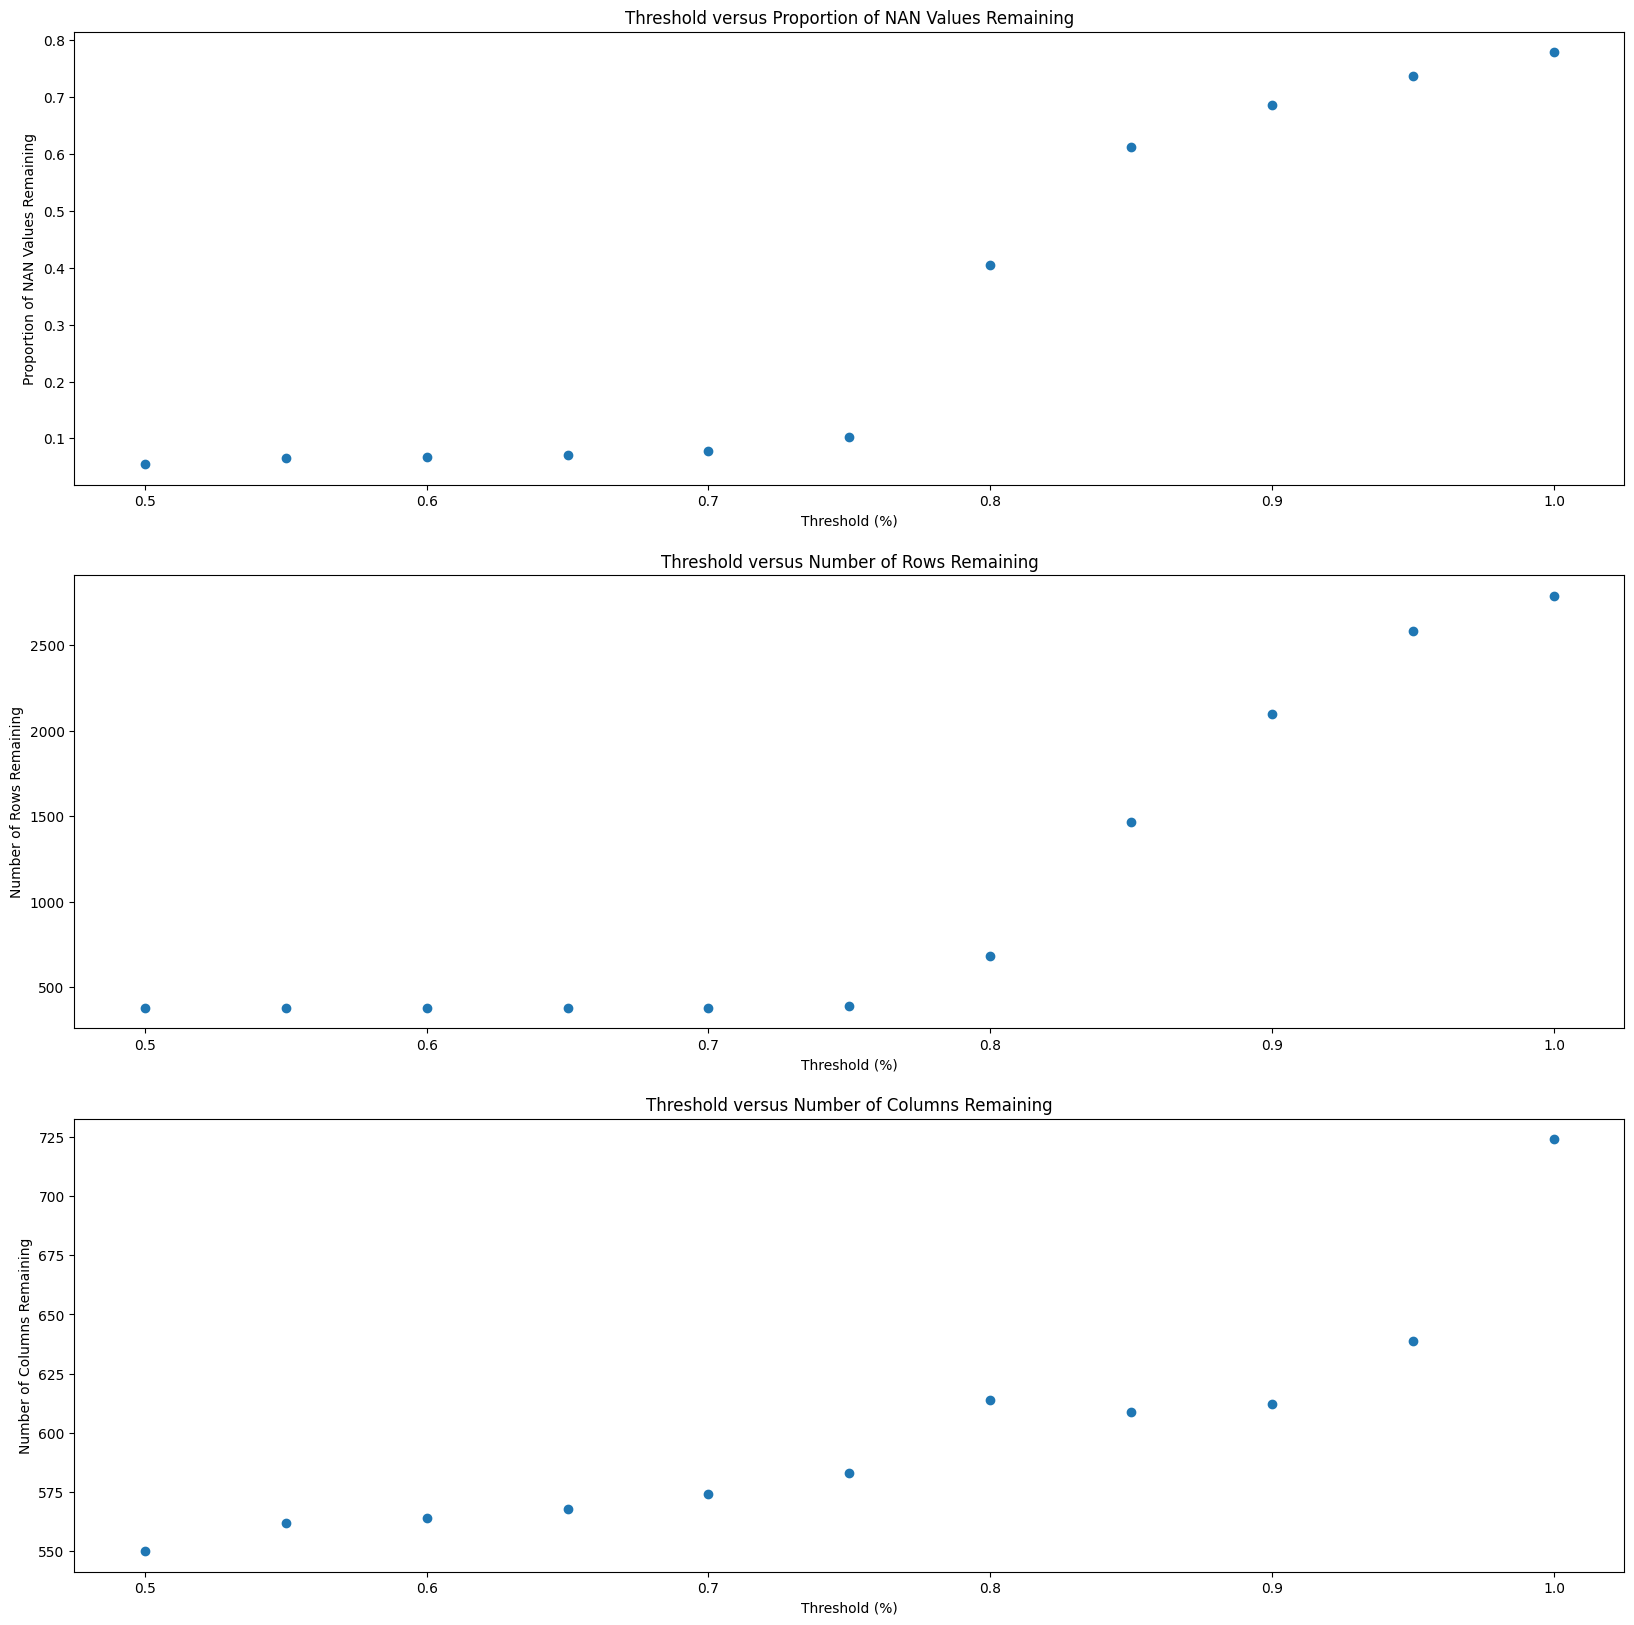

In [ ]:
_, axes = plt.subplots(3, 1, figsize=(20, 20))

axes[0].scatter(testing_thresholds, proportion_remaining)
axes[0].set_title('Threshold versus Proportion of NAN Values Remaining')
axes[0].set_xlabel('Threshold (%)')
axes[0].set_ylabel('Proportion of NAN Values Remaining')

axes[1].scatter(testing_thresholds, rows_remaining)
axes[1].set_title('Threshold versus Number of Rows Remaining')
axes[1].set_xlabel('Threshold (%)')
axes[1].set_ylabel('Number of Rows Remaining')

axes[2].scatter(testing_thresholds, columns_remaining)
axes[2].set_title('Threshold versus Number of Columns Remaining')
axes[2].set_xlabel('Threshold (%)')
axes[2].set_ylabel('Number of Columns Remaining')

## Train/Test Split by Country

### Test/train split

In [ ]:
import random
# Set a seed for reproducibility
random.seed(42)

In [ ]:
income_levels = ['linc', 'lm', 'um', 'hinc']

In [100]:
indexed.loc[['setting']]

KeyError: "['setting'] not in index"

In [ ]:
def split_by_inc(df):

    tv = []
    test = []

    for idx, inc in enumerate(income_levels):

        level = idx + 1 #increment by 1 because count starts from zero 
        
        #getting all countries with the index level 
        inc_countries = df[df['income_num'] == level]
        print(inc_countries.shape, level)

        #to get de-duplicated list of high income countries and shuffle the countries to prevent any biased ordering (alphabetical)
        countries = inc_countries['setting'].unique()
        random.shuffle(countries)

        #90% of countries to the train/val set, then the next 10% to the test set
        data_cutoff = len(inc_countries) * 0.9

        #to get the number of rows taken up by each country, and then get cumulative counts to get proportion
        country_rownum = inc_countries['setting'].value_counts().loc[countries]

        cumulative_num = country_rownum.cumsum()

        tv_countries = []
        test_countries = []

        for country, cumulative in zip(countries, cumulative_num):
            if cumulative <= data_cutoff:
                tv_countries.append(country)
            else:
                test_countries.append(country)

        tv_df = df[df['setting'].isin(tv_countries)]
        test_df = df[df['setting'].isin(test_countries)]

        tv.append(tv_df)
        test.append(test_df)

    #combining all train/val/test across the income levels 
    tv_combined_inc = pd.concat([tv[0], tv[1], tv[2], tv[3]], ignore_index=True)
    test_combined_inc = pd.concat([test[0], test[1], test[2], test[3]], ignore_index=True)
    
    #shuffling the combined dataframe to remove order 
    tv_shuffled_inc = tv_combined_inc.sample(frac=1, random_state=42).reset_index(drop=True)
    test_shuffled_inc = test_combined_inc.sample(frac=1, random_state=42).reset_index(drop=True)

    return tv_shuffled_inc, test_shuffled_inc

In [101]:
tv_shuffled, test_shuffled = split_by_inc(dropped) 

(78, 723) 1
(310, 723) 2
(996, 723) 3
(1405, 723) 4


In [67]:
len(tv_shuffled)/ (len(tv_shuffled) + len(test_shuffled))

0.8953029759770527

In [68]:
pd.DataFrame(tv_shuffled).to_csv('../split_income_data/train_val.csv')

In [69]:
train_val_income = pd.read_csv('../split_income_data/train_val.csv')
train_val_income = train_val_income.drop(columns=['Unnamed: 0'], axis=1)
train_val_income_input = train_val_income.drop(columns=['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
train_val_income_label = train_val_income['Maternal mortality ratio (national estimate, per 100,000 live births)']

### Cross-Validation

In [70]:
tv_shuffled['setting']

0             Slovenia
1       United Kingdom
2            Guatemala
3           Seychelles
4              Austria
             ...      
2492           Germany
2493           Namibia
2494      South Africa
2495           Austria
2496           Grenada
Name: setting, Length: 2497, dtype: object

In [75]:
#generate the k-fold cross-validation sets using scikit learn's GroupKFold method 
    #this method allows us to still separate by groups 

#gets the encoded country for each index 
groups = train_val_income['setting']
#shuffle = False to try to get same number of samples in each fold (80:20 split because there are 5 folds)
group_kfold = GroupKFold(n_splits=5, shuffle=False)
group_kfold.get_n_splits()

#split_dict = split_number : [train data, validation data, ratio]
split_dict = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}
for i, (train_index, val_index) in enumerate(group_kfold.split(train_val_income, groups=groups)):
    split_dict[i].append(train_val_income.iloc[train_index])
    split_dict[i].append(train_val_income.iloc[val_index])
    ratio_val = len(val_index)/(len(train_index) + len(val_index))
    split_dict[i].append(ratio_val) 
    print("Fold " + str(i))
    print(ratio_val)
    ratio_train = len(train_index)/(len(train_index) + len(val_index))
    print(ratio_train)

Fold 0
0.2002402883460152
0.7997597116539847
Fold 1
0.2002402883460152
0.7997597116539847
Fold 2
0.1998398077693232
0.8001601922306768
Fold 3
0.1998398077693232
0.8001601922306768
Fold 4
0.1998398077693232
0.8001601922306768


### Iterative Thresholding on Folds

I want to iteratively threshold each cross-validation fold so all columns and rows contain at most 85%, 95%, and 100% missing data 

In [125]:
needed_thresholds = [0.85, 0.90, 0.95, 1]

#fold : train_85, rows_left, col_left, train_95, rows_left, col_left, train_100, rows_left, col_left
folds_thresh = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}

for fold in range(0, 5):
    for thresh in needed_thresholds:
        new_data, new_proportion, new_changes = iterative_thresholding(split_dict[fold][0], thresh)
        folds_thresh[fold].append(new_data)
        folds_thresh[fold].append(new_data.shape[0])
        folds_thresh[fold].append(new_data.shape[1])

### Saving Data

In [128]:
train_filepath = '../split_income_data/train'
val_filepath = '../split_income_data/val'
test_filepath = '../split_income_data/test'
train_filepath_withinc = '../data_with_yearcountry/income/train'
val_filepath_withinc = '../data_with_yearcountry/income/val'
test_filepath_withinc = '../data_with_yearcountry/income/test'

In [37]:
test_shuffled['Maternal mortality ratio (modeled estimate, per 100,000 live births)']

KeyError: 'Maternal mortality ratio (modeled estimate, per 100,000 live births)'

In [105]:
########### test set

test_input = test_shuffled.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
test_labels = test_shuffled[['Maternal mortality ratio (national estimate, per 100,000 live births)']]

pd.DataFrame(test_input).to_csv(test_filepath + '/X_test.csv')
pd.DataFrame(test_labels).to_csv(test_filepath + '/y_test.csv')

In [ ]:
test_input_with = test_shuffled.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
test_labels_with = test_shuffled[['Maternal mortality ratio (national estimate, per 100,000 live births)']]

pd.DataFrame(test_input_with).to_csv(test_filepath_withinc + '/X_test.csv')
pd.DataFrame(test_labels_with).to_csv(test_filepath_withinc + '/y_test.csv')

In [106]:
########### validation set

for fold in range(0, 5):
    data = split_dict[fold][1]
    val_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
    val_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
    pd.DataFrame(val_input).to_csv(val_filepath + '/X_val_' + str(fold) + '.csv')
    pd.DataFrame(val_labels).to_csv(val_filepath + '/y_val_' + str(fold) + '.csv')

In [134]:
for fold in range(5):
    data = split_dict[fold][1]
    val_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
    print(val_input.groupby('income_num').size())

income_num
1.0     10
2.0     64
3.0    178
4.0    248
dtype: int64
income_num
1.0     15
2.0     87
3.0    116
4.0    282
dtype: int64
income_num
1.0      9
2.0     46
3.0    155
4.0    289
dtype: int64
income_num
1.0     23
2.0     44
3.0    174
4.0    258
dtype: int64
income_num
1.0     11
2.0     37
3.0    273
4.0    178
dtype: int64


In [ ]:
########### validation set

for fold in range(0, 5):
    data = split_dict[fold][1]
    val_input_with = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
    val_labels_with = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
    pd.DataFrame(val_input_with).to_csv(val_filepath_withinc + '/X_val_' + str(fold) + '.csv')
    pd.DataFrame(val_labels_with).to_csv(val_filepath_withinc + '/y_val_' + str(fold) + '.csv')

In [133]:
########### train set

threshs = ['85', '90', '95', '1']

for fold in range(0, 5):
    for idx, thresh in enumerate(threshs):
        idx_multiple = idx*3
        data = folds_thresh[fold][idx_multiple]
        train_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
        train_input_idx_drop = train_input.drop(columns=['index'], axis=1)
        train_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
        pd.DataFrame(train_input_idx_drop).to_csv(train_filepath + '/X_train_' + str(fold) + '_' + thresh + '.csv')
        pd.DataFrame(train_labels).to_csv(train_filepath + '/y_train_' + str(fold) + '_' + thresh + '.csv')

In [129]:
########### train set

threshs = ['85', '90', '95', '1']

for fold in range(0, 5):
    for idx, thresh in enumerate(threshs):
        idx_multiple = idx*3
        data = folds_thresh[fold][idx_multiple]
        train_input_with = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
        train_input_idx_drop_with = train_input_with.drop(columns=['index'], axis=1)
        train_labels_with = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
        pd.DataFrame(train_input_idx_drop_with).to_csv(train_filepath_withinc + '/X_train_' + str(fold) + '_' + thresh + '.csv')
        pd.DataFrame(train_labels_with).to_csv(train_filepath_withinc + '/y_train_' + str(fold) + '_' + thresh + '.csv')

## Train/Test Split by Year

In [108]:
import random
# Set a seed for reproducibility
random.seed(42)

In [10]:
(2018-1985) * 0.9

29.7

In [18]:
#2018, 2017, 2016, 2015
(4) / (2018-1984)

0.11764705882352941

In [43]:
1985+30

2015

In [109]:
# put all data from 2015-2018 into the test set, and all data from 1985-2015 in the training/validation set 
dropped['date'] = dropped['date'].astype(str)
dropped = dropped[dropped['income_num'] != 0]

tv = dropped[dropped['date'] < '2015']
test = dropped[dropped['date'] >= '2015']

#shuffling the combined dataframe to remove order 
tv_shuffled_year = tv.sample(frac=1, random_state=42).reset_index(drop=True)
test_shuffled_year = test.sample(frac=1, random_state=42).reset_index(drop=True)

#generate the k-fold cross-validation sets using scikit learn's GroupKFold method 
    #this method allows us to still separate by groups 

#gets the encoded country for each index 
groups_year = tv_shuffled_year['date']
#shuffle = False to try to get same number of samples in each fold (80:20 split because there are 5 folds)
group_kfold_year = GroupKFold(n_splits=5, shuffle=False)
group_kfold_year.get_n_splits()

#split_dict = split_number : [train data, validation data, ratio]
split_dict_year = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}
for i, (train_index, val_index) in enumerate(group_kfold_year.split(tv_shuffled_year, groups=groups_year)):
    split_dict_year[i].append(tv_shuffled_year.iloc[train_index])
    split_dict_year[i].append(tv_shuffled_year.iloc[val_index])
    ratio_val_year = len(val_index)/(len(train_index) + len(val_index))
    split_dict_year[i].append(ratio_val_year) 
    print("Fold " + str(i))
    print(ratio_val_year)
    ratio_train_year = len(train_index)/(len(train_index) + len(val_index))
    print(ratio_train_year)

Fold 0
0.2003093580819799
0.7996906419180201
Fold 1
0.19953596287703015
0.8004640371229699
Fold 2
0.20108275328692962
0.7989172467130704
Fold 3
0.19953596287703015
0.8004640371229699
Fold 4
0.19953596287703015
0.8004640371229699


In [110]:
tv_shuffled_year['income_num'].unique()

array([3., 4., 2., 1.])

In [111]:
pd.DataFrame(tv_shuffled_year).to_csv('../split_year_data/train_val.csv')

In [45]:
split_dict_year[0][0]['date'].unique()

array(['1994.0', '1985.0', '1995.0', '1992.0', '1993.0', '2014.0',
       '2013.0', '1996.0', '2000.0', '2012.0', '1987.0', '2001.0',
       '2008.0', '2006.0', '2010.0', '2003.0', '1998.0', '2007.0',
       '1989.0', '2005.0', '1988.0', '1997.0', '1990.0', '2009.0'],
      dtype=object)

In [46]:
split_dict_year[0][1]['date'].unique()

array(['2004.0', '2011.0', '2002.0', '1999.0', '1991.0', '1986.0'],
      dtype=object)

In [130]:
#missing data thresholds

needed_thresholds_year = [0.85, 0.90, 0.95, 1]

#fold : train_85, rows_left, col_left, train_95, rows_left, col_left, train_100, rows_left, col_left
folds_thresh_year = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}

for fold in range(0, 5):
    for thresh in needed_thresholds_year:
        new_data, new_proportion, new_changes = iterative_thresholding(split_dict_year[fold][0], thresh)
        folds_thresh_year[fold].append(new_data)
        folds_thresh_year[fold].append(new_data.shape[0])
        folds_thresh_year[fold].append(new_data.shape[1]) 

### Saving Data

In [121]:
train_filepath_year = '../split_year_data/train'
val_filepath_year = '../split_year_data/val'
test_filepath_year = '../split_year_data/test'
train_filepath_withyear = '../data_with_yearcountry/year/train'
val_filepath_withyear = '../data_with_yearcountry/year/val'
test_filepath_withyear = '../data_with_yearcountry/year/test'

In [113]:
########### test set

test_input_year = test_shuffled_year.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
test_labels_year = test_shuffled_year[['Maternal mortality ratio (national estimate, per 100,000 live births)']]

pd.DataFrame(test_input_year).to_csv(test_filepath_year + '/X_test.csv')
pd.DataFrame(test_labels_year).to_csv(test_filepath_year + '/y_test.csv')

In [122]:
########### test set

test_input_year_with = test_shuffled_year.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
test_labels_year_with = test_shuffled_year[['Maternal mortality ratio (national estimate, per 100,000 live births)']]

pd.DataFrame(test_input_year_with).to_csv(test_filepath_withyear + '/X_test.csv')
pd.DataFrame(test_labels_year_with).to_csv(test_filepath_withyear + '/y_test.csv')

In [114]:
########### validation set

for fold in range(0, 5):
    data = split_dict_year[fold][1]
    val_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
    val_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
    pd.DataFrame(val_input).to_csv(val_filepath_year + '/X_val_' + str(fold) + '.csv')
    pd.DataFrame(val_labels).to_csv(val_filepath_year + '/y_val_' + str(fold) + '.csv')

In [136]:
for fold in range(5):
    data = split_dict_year[fold][1]
    val_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
    print(val_input.groupby('income_num').size())

income_num
1.0     11
2.0     54
3.0    189
4.0    264
dtype: int64
income_num
1.0     18
2.0     60
3.0    183
4.0    255
dtype: int64
income_num
1.0     19
2.0     50
3.0    187
4.0    264
dtype: int64
income_num
1.0      8
2.0     57
3.0    186
4.0    265
dtype: int64
income_num
1.0     15
2.0     55
3.0    181
4.0    265
dtype: int64


In [123]:
########### validation set

for fold in range(0, 5):
    data = split_dict_year[fold][1]
    val_input_with = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
    val_labels_with = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
    pd.DataFrame(val_input_with).to_csv(val_filepath_withyear + '/X_val_' + str(fold) + '.csv')
    pd.DataFrame(val_labels_with).to_csv(val_filepath_withyear + '/y_val_' + str(fold) + '.csv')

In [132]:
########### train set

threshs = ['85', '90', '95', '1']

for fold in range(0, 5):
    for idx, thresh in enumerate(threshs):
        idx_multiple = idx*3
        data = folds_thresh_year[fold][idx_multiple]
        train_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)', 'date', 'setting'], axis=1)
        train_input_idx_drop = train_input.drop(columns=['index'], axis=1)
        train_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
        pd.DataFrame(train_input_idx_drop).to_csv(train_filepath_year + '/X_train_' + str(fold) + '_' + thresh + '.csv')
        pd.DataFrame(train_labels).to_csv(train_filepath_year + '/y_train_' + str(fold) + '_' + thresh + '.csv')

In [131]:
########### train set

threshs = ['85', '90', '95', '1']

for fold in range(0, 5):
    for idx, thresh in enumerate(threshs):
        idx_multiple = idx*3
        data = folds_thresh_year[fold][idx_multiple]
        train_input_with = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
        train_input_idx_drop_with = train_input_with.drop(columns=['index'], axis=1)
        train_labels_with = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
        pd.DataFrame(train_input_idx_drop_with).to_csv(train_filepath_withyear + '/X_train_' + str(fold) + '_' + thresh + '.csv')
        pd.DataFrame(train_labels_with).to_csv(train_filepath_withyear + '/y_train_' + str(fold) + '_' + thresh + '.csv')